<a href="https://colab.research.google.com/github/cartika/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**



Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

#**CONTENTS**
* EDA
* Correlation
* Feature Selection
* SMOT
* Model Fitting
* Hyperparameter Tunung

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn --upgrade

# Model Selection and Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
!pip3 install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve
from sklearn import metrics

# Hyperparamter Tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading data**

In [ ]:
insurance = pd.read_csv('/content/drive/MyDrive/capstone- 3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
insurance

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


**ATTRIBUTES**

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested





.







.

In [ ]:
#dropping id column as it contains only discrete values
insurance.drop('id',axis=1,inplace=True)

In [ ]:
insurance.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**No Null values present in data**





.





.

#**EDA**

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


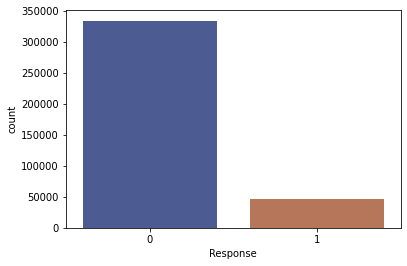

In [ ]:
sns.countplot(insurance['Response'], palette='dark', alpha=0.75)

In [ ]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


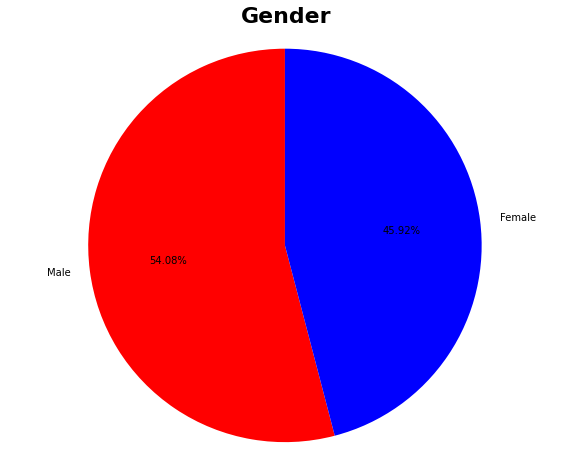

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(insurance.Gender.value_counts(),startangle=90,autopct='%.2f%%',colors=['red','blue'],radius=4,labels=['Male','Female'])
plt.title('Gender',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

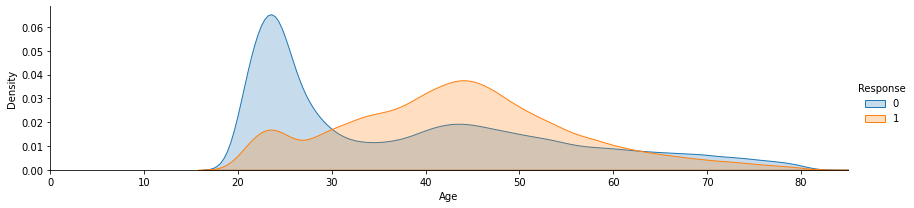

In [ ]:
age = sns.FacetGrid(insurance,hue="Response",aspect = 4)
age.map(sns.kdeplot,"Age",shade = True)
age.set(xlim = (0,insurance["Age"].max()))
age.add_legend()
plt.show()

**Here we can see that, people ages between 39 to 50 are most likely to Response. 
People ages between 20 to 30 are most likely to Not Response**







.







.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


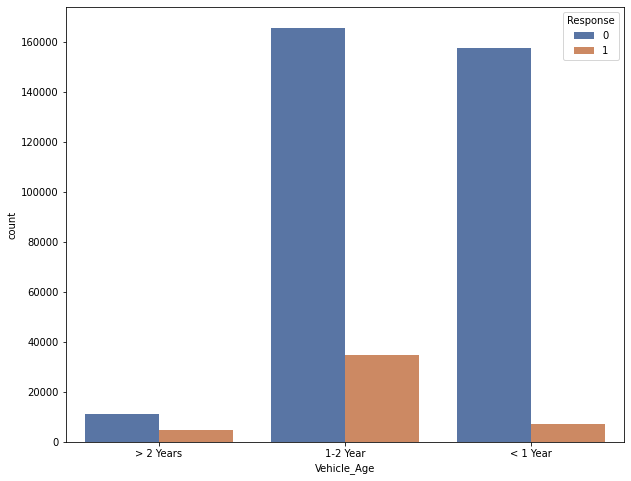

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(insurance.Vehicle_Age,hue=insurance.Response,palette='deep')
plt.show()

**People having Cars with age between 1-2 years are most likely to Response.  
People having Cars with age greater than 2 years are less likely to response**





.








.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


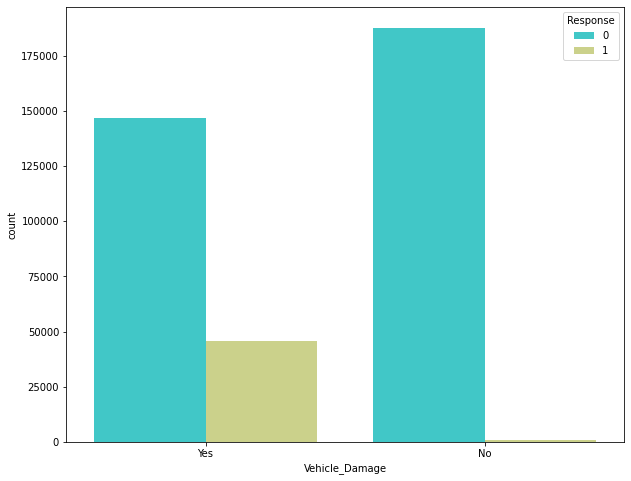

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(insurance.Vehicle_Damage,hue=insurance.Response,palette='rainbow')
plt.show()

**it is obvious that people with vehicle damage are more likely to response**




.





.






.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Annual premium log')

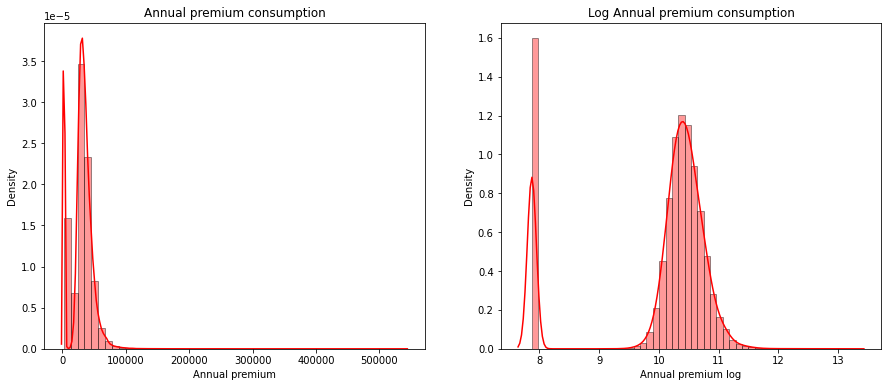

In [ ]:
f,ax = plt.subplots(1, 2,figsize=(15,6))


#plotting distribution of target column appliances
sns.distplot(insurance.Annual_Premium, hist=True, color = 'red',hist_kws={'edgecolor':'black'},ax=ax[0])
ax[0].set_title("Annual premium consumption")
ax[0].set_xlabel('Annual premium')

#ploting distribution of log of target column appliances
sns.distplot(np.log(insurance.Annual_Premium), hist=True, color = 'red',hist_kws={'edgecolor':'black'},ax=ax[1])
ax[1].set_title("Log Annual premium consumption")
ax[1].set_xlabel('Annual premium log')



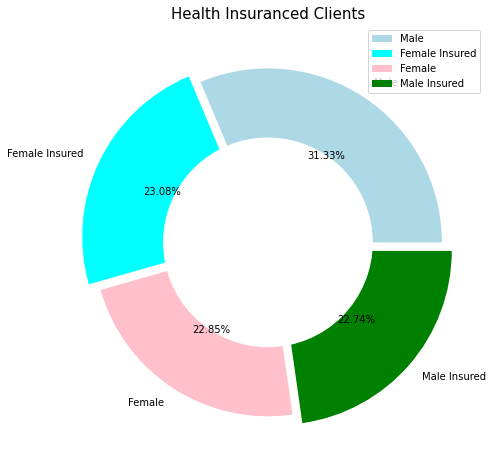

In [ ]:
plt.title('Health Insuranced Clients',fontsize=15)
circle = plt.Circle((0, 0), 0.6, color = 'white')
health = insurance[['Gender','Previously_Insured']].values.tolist()
health = pd.DataFrame([h[0] + ' Insured' if h[1] == 1 else h[0] for h in health ],columns=['Gen_Ins'])
health['Gen_Ins'].value_counts().plot(kind='pie', explode=[0, 0.075, 0, 0.075], figsize=(8, 8), rot=1, colors=['lightblue', 'cyan', 'pink', 'green'], autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()



plt.show()

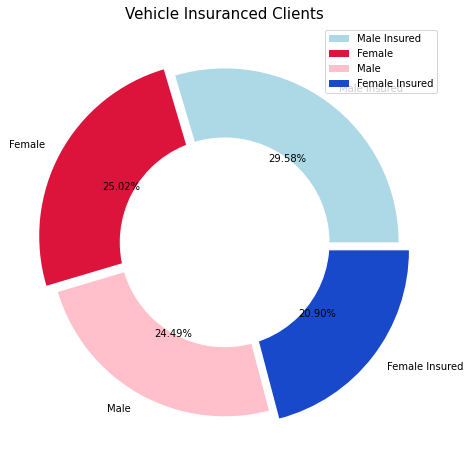

In [ ]:
plt.title('Vehicle Insuranced Clients',fontsize=15)
circle = plt.Circle((0, 0), 0.6, color = 'white')
health = insurance[['Gender','Vehicle_Damage']].values.tolist()
health = pd.DataFrame([h[0] + ' Insured' if h[1] == 'Yes' else h[0] for h in health ],columns=['Veh_Ins'])
health['Veh_Ins'].value_counts().plot(kind='pie', explode=[0, 0.075, 0, 0.075], figsize=(8, 8), rot=1, colors=['lightblue', 'crimson', 'pink', '#1849CA'], autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()


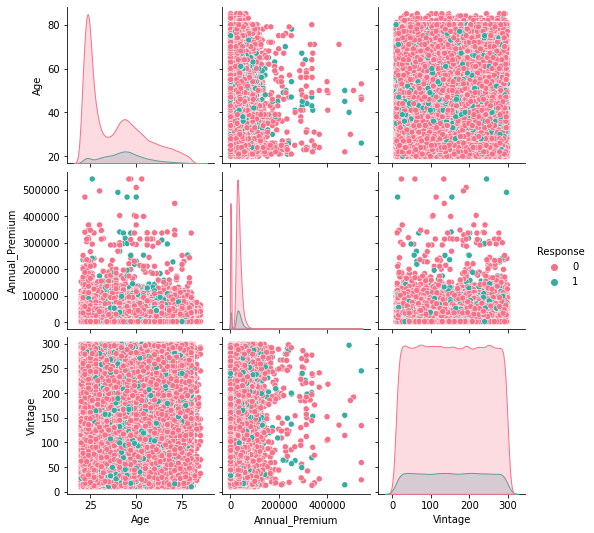

In [ ]:
pp_plot_data = insurance.drop(['Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)
sns.pairplot(pp_plot_data, hue="Response", palette="husl");

**There is large correlation between all the features.
....Some columns are skewed. we have to remove them**
.






.


.



In [ ]:
insurance['log_age'] = np.log(insurance['Age'])
insurance['log_annual_premium'] = np.log(insurance['Annual_Premium'])
insurance['log_vintage'] = np.log(insurance['Vintage'])

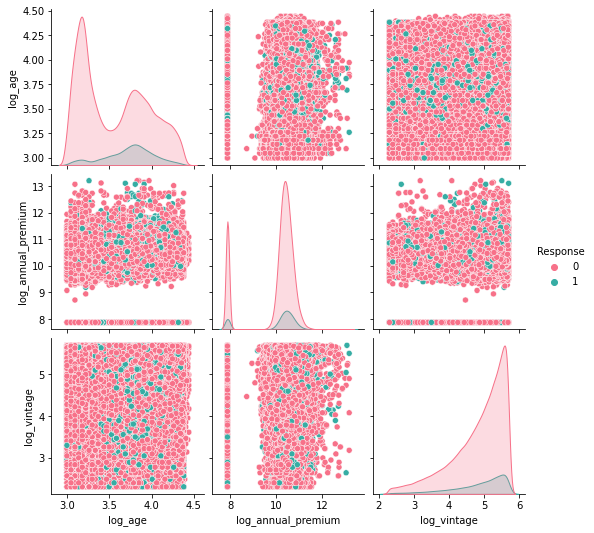

In [ ]:
pp2= insurance.drop(['Age','Annual_Premium','Vintage','Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)

sns.pairplot(pp2, hue="Response", palette="husl");


**log transformation of vintage and age was not helpful**

**lets try removing outliers from  Annual premium**
.




.






.





In [ ]:
insurance['log_annual_premium'].describe()

count    381109.000000
mean         10.014695
std           1.005080
min           7.874739
25%          10.102543
50%          10.363094
75%          10.581521
max          13.199630
Name: log_annual_premium, dtype: float64

**Visualising annual premium to remove outliers**


 

 .






 .

# **CORRELATION**

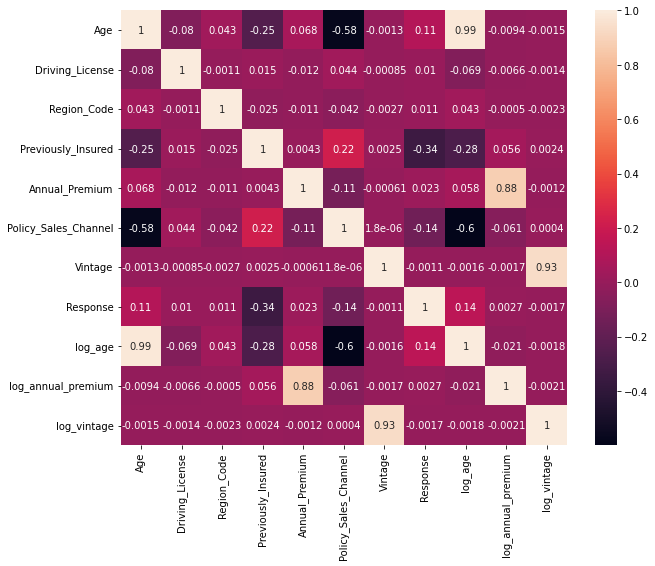

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(insurance.corr(),annot=True)

**vintage has no correlation with response so dropping the column**
.






.






.

**Selecting Features**

In [ ]:
#dropping log normalizations as they didnt work
insurance = insurance.drop(['Vintage', 'log_vintage' , 'log_age','log_annual_premium'], axis=1)

**Extracting categorical and numerical variables**

In [ ]:
numerical_cols=[]
categorical_cols=[]
for i in insurance.columns:
    if insurance[i].dtype=="object":
           categorical_cols.append(i)
            
    else:
            numerical_cols.append(i)

print(categorical_cols)
print(numerical_cols)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Response']


In [ ]:
numerical = ['Age','Policy_Sales_Channel', 'Annual_Premium' ]
ordinal_cat = ['Vehicle_Age']
nominal_cat = ['Gender','Vehicle_Damage', 'Previously_Insured', 'Driving_License',  'Region_Code'   ]

.




.





.




.
**ENCODING CATEGORICAL VARIABLES**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance["Vehicle_Damage"] = le.fit_transform(insurance["Vehicle_Damage"])

insurance['Gender'] = le.fit_transform(insurance['Gender'])
insurance['Driving_License'] = le.fit_transform(insurance['Driving_License'])
insurance['Previously_Insured'] = le.fit_transform(insurance['Previously_Insured'])
insurance['Vehicle_Damage'] = le.fit_transform(insurance['Vehicle_Damage'])
insurance['Driving_License'] = le.fit_transform(insurance['Driving_License'])

In [ ]:
insurance = insurance.drop(['Gender','Vehicle_Age','Annual_Premium'],axis=1)
insurance

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Response
0,44,1,28.0,0,1,26.0,1
1,76,1,3.0,0,0,26.0,0
2,47,1,28.0,0,1,26.0,1
3,21,1,11.0,1,0,152.0,0
4,29,1,41.0,1,0,152.0,0
...,...,...,...,...,...,...,...
381104,74,1,26.0,1,0,26.0,0
381105,30,1,37.0,1,0,152.0,0
381106,21,1,30.0,1,0,160.0,0
381107,68,1,14.0,0,1,124.0,0


.



.




#**SMOTE**

In [ ]:
from sklearn.model_selection import train_test_split
X = insurance.drop('Response', axis=1)
y = insurance['Response']


#splitting data into train and test
X_train1, X_test, y_train1, y_test = train_test_split(X.values, y.values, test_size=0.25 , random_state=1)

#smote
oversample=SMOTE()
X_train, y_train =oversample.fit_sample(X_train1, y_train1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print('BEFORE SMOTE',Counter(y_train))
print('AFTER SMOTE',Counter(y_train1))

BEFORE SMOTE Counter({0: 250688, 1: 250688})
AFTER SMOTE Counter({0: 250688, 1: 35143})


.



.




**Scaling inputs**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for each model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(X.values)
X = scaler.transform(X_train)
X = scaler.transform(X_test)

#**Models for Fitting**

In [ ]:
model = {
    "Decision Tree": DecisionTreeClassifier(), 
    "Random Forest" : RandomForestClassifier(), 
    "Gradient Boosting" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier(),
    "CatBoost" : CatBoostClassifier(),
    "LGBM" : LGBMClassifier()
        }

**Fitting and Evaluation**

In [ ]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print('for',mod)
    
    score = classifier.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, score, average='weighted')
    prob_score[mod] = score

    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        precision_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred, average='weighted'),
        roc
    ])

for Decision Tree
for Random Forest
for Gradient Boosting
for XGBoost
Learning rate set to 0.146522
0:	learn: 0.5588437	total: 252ms	remaining: 4m 11s
1:	learn: 0.4980272	total: 407ms	remaining: 3m 23s
2:	learn: 0.4653641	total: 573ms	remaining: 3m 10s
3:	learn: 0.4485293	total: 727ms	remaining: 3m
4:	learn: 0.4370868	total: 882ms	remaining: 2m 55s
5:	learn: 0.4294368	total: 1.05s	remaining: 2m 54s
6:	learn: 0.4246407	total: 1.21s	remaining: 2m 51s
7:	learn: 0.4211930	total: 1.37s	remaining: 2m 50s
8:	learn: 0.4188156	total: 1.53s	remaining: 2m 48s
9:	learn: 0.4165786	total: 1.69s	remaining: 2m 47s
10:	learn: 0.4146827	total: 1.85s	remaining: 2m 46s
11:	learn: 0.4122250	total: 2.02s	remaining: 2m 46s
12:	learn: 0.4109411	total: 2.2s	remaining: 2m 46s
13:	learn: 0.4101969	total: 2.36s	remaining: 2m 46s
14:	learn: 0.4094381	total: 2.53s	remaining: 2m 46s
15:	learn: 0.4084551	total: 2.7s	remaining: 2m 46s
16:	learn: 0.4070877	total: 2.87s	remaining: 2m 46s
17:	learn: 0.4062856	total: 3.05

**CONFUSION MATRICES**

In [ ]:
for mod in model:
    classifier = model[mod]
    pred = classifier.predict(X_test)
    print('for',mod)
   
    print(metrics.confusion_matrix(y_test, pred))
    print('\n\n')

for Decision Tree
[[64917 18794]
 [ 3634  7933]]



for Random Forest
[[64582 19129]
 [ 3449  8118]]



for Gradient Boosting
[[55700 28011]
 [  845 10722]]



for XGBoost
[[54759 28952]
 [  712 10855]]



for CatBoost
[[63756 19955]
 [ 2719  8848]]



for LGBM
[[58708 25003]
 [ 1271 10296]]





In [ ]:

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df 

,Accuracy,F1 Score,Precision,Recall,ROC AUC
Decision Tree,0.764605,0.799481,0.868056,0.764605,0.789548
Random Forest,0.763030,0.798652,0.870226,0.763030,0.821990
Gradient Boosting,0.697139,0.749593,0.899074,0.697139,0.853343
XGBoost,0.688658,0.742644,0.900425,0.688658,0.853076
CatBoost,0.762023,0.799169,0.879954,0.762023,0.846856
LGBM,0.724239,0.771286,0.895390,0.724239,0.853909


**------JUDGING FROM EVALUATION MATRICES CATBOOST ,RANDOM FOREST GAVE BEST RESULT BUT WE HAVE OBSERVED FROM CONFUSION MATRICES THAT MOST MODELS DOESNT  PERFORM WELL ON RESPONSE 1**


**---- SO OVERALL RANDOM FOREST IS BEST CLASSIFIER AS IT PERFORMS WELL ON RESPONSE 1 TOO**

**----LIGHTGBM ALSO GAVE GOOD RESULT ON CONFUSION MATRIX ALONG WITH ACC, ROC, PRECISION AND RECALL**

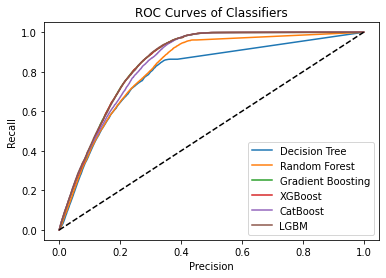

In [ ]:
plt.title('ROC Curves of Classifiers')
plt.xlabel('Precision')
plt.ylabel('Recall')

for key in prob_score:
    fpr, tpr, _ = roc_curve(y_test, prob_score[key])
    plt.plot(fpr, tpr, label=key)

plt.plot((0,1), ls='dashed',color='black')
plt.legend()
plt.show()

**roc_auc PERFORMED WELL ON ALMOST ALL CLASSIFIERS**
.




.





.





.

#**HYPERPARAMETER TUNING WITH RANDOMIZED SEARCHCV**

**BY OVERALL PERFORMANCE WE PICKED RAMDOM FOREST FOR TUNING**

In [ ]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}



clf = LGBMClassifier(max_depth=-1, random_state=15, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=15,
    verbose=True)


# Uncomment to perform Randomsearch
# gs.fit(X_train, y_train, **fit_params)
# print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Randomsearch_params = {'colsample_bytree': 0.6261473679815167, 'min_child_samples': 237, 'min_child_weight': 0.001, 'num_leaves': 28, 'reg_alpha': 10, 'reg_lambda': 10, 'subsample': 0.7567691135431514} 

In [ ]:
def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

#set optimal parameters
clf_sw = LGBMClassifier(**clf.get_params())
clf_sw.set_params(**Randomsearch_params)
clf_sw.fit(X_train,y_train, **fit_params, callbacks=[reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.854146
Early stopping, best iteration is:
[70]	valid's auc: 0.854562


LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.6261473679815167, importance_type='split',
               learning_rate=0.1, max_depth=-1, metric='None',
               min_child_samples=237, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=5000, n_jobs=4, num_leaves=28,
               objective=None, random_state=15, reg_alpha=10, reg_lambda=10,
               silent=True, subsample=0.7567691135431514,
               subsample_for_bin=200000, subsample_freq=0)

**--- We observed that Hyperparameter tuning with randomized search CV did not improve the model performance**

**--- we are sticking to our original random forest model as it gave food accuracy on both Responses(0 and 1) and performed well on other matrices too**

**--- Random Forest ROC AUC =82% and ACCURacy = 76%**

**--- outlier removal gave worst results**